### EUR/USD Pair Analysis using Matplotlib

The focus of this project is to make informative and visually appealing plots with the use of matplotlib. We will be aiming to style our plots similarly to the style used by FiveThirtyEight. As for data, we will be using a data set of recorded exchange rates for multiple different currency pairs vs. the EUR (link to the dataset can be found below). 

The exchange rate data used for the project can be downloaded here: <br />
https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020





In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

exchange_rate = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [4]:
exchange_rate.shape

(5699, 41)

In [5]:
exchange_rate.isnull().sum().sort_values(ascending=False)

[Greek drachma ]            5179
[Slovenian tolar ]          3614
[Cypriot pound ]            3353
[Maltese lira ]             3353
[Slovak koruna ]            3091
[Estonian kroon ]           2569
[Iceland krona ]            2407
[Latvian lats ]             1795
[Lithuanian litas ]         1540
[Bulgarian lev ]             402
[Indian rupee ]              268
[Brazilian real ]            268
[Chinese yuan renminbi ]     268
[Croatian kuna ]             268
[Israeli shekel ]            268
[Turkish lira ]               62
[Romanian leu ]               62
[UK pound sterling ]           0
[South African rand ]          0
[Danish krone ]                0
[Czech koruna ]                0
[Swiss franc ]                 0
[Canadian dollar ]             0
[Australian dollar ]           0
[Hong Kong dollar ]            0
[Japanese yen ]                0
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[US dollar ]                   0
[Korean won ]                  0
[Mexican p

In [6]:
exchange_rate.dropna(axis=1,thresh=5000,inplace=True)

In [7]:
exchange_rate.isnull().sum().sort_values(ascending=False)

[Bulgarian lev ]            402
[Indian rupee ]             268
[Brazilian real ]           268
[Croatian kuna ]            268
[Israeli shekel ]           268
[Chinese yuan renminbi ]    268
[Turkish lira ]              62
[Romanian leu ]              62
[UK pound sterling ]          0
[Hungarian forint ]           0
[Hong Kong dollar ]           0
[Swiss franc ]                0
[Danish krone ]               0
[Czech koruna ]               0
[Canadian dollar ]            0
[Australian dollar ]          0
[Indonesian rupiah ]          0
[South African rand ]         0
[US dollar ]                  0
[Japanese yen ]               0
[Korean won ]                 0
[Mexican peso ]               0
[Malaysian ringgit ]          0
[Norwegian krone ]            0
[New Zealand dollar ]         0
[Philippine peso ]            0
[Polish zloty ]               0
[Russian rouble ]             0
[Swedish krona ]              0
[Singapore dollar ]           0
[Thai baht ]                  0
Period\U

In [8]:
exchange_rate.rename(columns={'Period\\Unit:':'TIME'},inplace=True)
exchange_rate.columns = exchange_rate.columns.str.replace('[','').str.replace(']','').str.strip().str.replace(' ','_').str.upper()
action_columns = exchange_rate.columns[1:]

In [9]:
exchange_rate.isnull().sum().sort_values(ascending=False)

BULGARIAN_LEV            402
INDIAN_RUPEE             268
BRAZILIAN_REAL           268
CROATIAN_KUNA            268
ISRAELI_SHEKEL           268
CHINESE_YUAN_RENMINBI    268
TURKISH_LIRA              62
ROMANIAN_LEU              62
UK_POUND_STERLING          0
HUNGARIAN_FORINT           0
HONG_KONG_DOLLAR           0
SWISS_FRANC                0
DANISH_KRONE               0
CZECH_KORUNA               0
CANADIAN_DOLLAR            0
AUSTRALIAN_DOLLAR          0
INDONESIAN_RUPIAH          0
SOUTH_AFRICAN_RAND         0
US_DOLLAR                  0
JAPANESE_YEN               0
KOREAN_WON                 0
MEXICAN_PESO               0
MALAYSIAN_RINGGIT          0
NORWEGIAN_KRONE            0
NEW_ZEALAND_DOLLAR         0
PHILIPPINE_PESO            0
POLISH_ZLOTY               0
RUSSIAN_ROUBLE             0
SWEDISH_KRONA              0
SINGAPORE_DOLLAR           0
THAI_BAHT                  0
TIME                       0
dtype: int64

In [10]:
exchange_rate['TIME'] = pd.to_datetime(exchange_rate['TIME'])

In [11]:
exchange_rate['MONTH'] = exchange_rate['TIME'].dt.month
exchange_rate['YEAR'] = exchange_rate['TIME'].dt.year


In [12]:
exchange_rate.head(5)

,TIME,AUSTRALIAN_DOLLAR,BULGARIAN_LEV,BRAZILIAN_REAL,CANADIAN_DOLLAR,SWISS_FRANC,CHINESE_YUAN_RENMINBI,CZECH_KORUNA,DANISH_KRONE,UK_POUND_STERLING,...,ROMANIAN_LEU,RUSSIAN_ROUBLE,SWEDISH_KRONA,SINGAPORE_DOLLAR,THAI_BAHT,TURKISH_LIRA,US_DOLLAR,SOUTH_AFRICAN_RAND,MONTH,YEAR
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,26.163,7.4369,0.90128,...,4.8708,90.8000,10.0510,1.6228,36.8480,9.0146,1.2250,18.7212,1,2021
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,26.147,7.4392,0.90190,...,4.8712,91.2000,10.0575,1.6253,36.8590,8.9987,1.2276,18.7919,1,2021
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,26.145,7.4393,0.90635,...,4.8720,90.8175,10.0653,1.6246,36.9210,9.0554,1.2338,18.5123,1,2021
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,26.227,7.4387,0.90333,...,4.8721,91.6715,10.0570,1.6180,36.7760,9.0694,1.2271,18.4194,1,2021
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,26.141,7.4379,0.90160,...,4.8713,90.3420,10.0895,1.6198,36.7280,9.0579,1.2296,17.9214,1,2021


In [13]:
for i in action_columns:
    exchange_rate[i] = pd.to_numeric(exchange_rate[i],errors='coerce')

In [14]:
exchange_rate['US_DOLLAR_R7d'] = exchange_rate['US_DOLLAR'].rolling(7).mean()
exchange_rate['US_DOLLAR_R30d'] = exchange_rate['US_DOLLAR'].rolling(30).mean()
exchange_rate['US_DOLLAR_R365d'] = exchange_rate['US_DOLLAR'].rolling(365).mean()

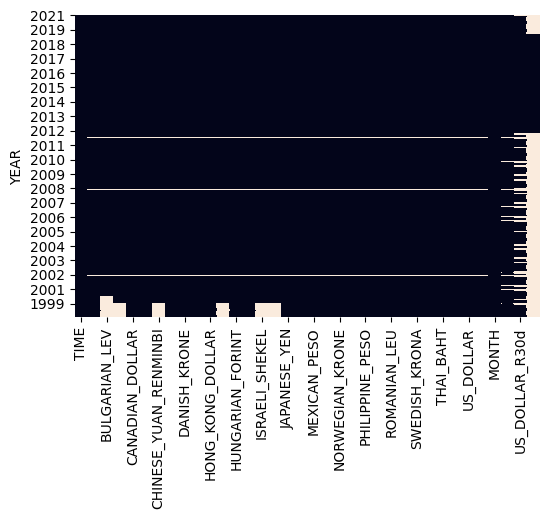

In [15]:
nan_view = exchange_rate.set_index('YEAR')
sns.heatmap(nan_view.isnull(),cbar=False)


The first stage of our project involved data exploration/cleaning. We started by removing columns with over 50% null values since those columns won't really provide us with any meaningfull information alongside other datapoints. We also take time to clean up the column names in order to make them easier to work with as the project progresses.We conclude this first stage by visualizing our null values as a function of the dataframe. Our visualization shows that we are missing very little data now, we can progress to the next steps of the project. The main reason I decided to add the nulls visualization to this project was to keep in line with the fact that this is a visualization focused project.

## Part 1: EUR/USD Performance During Coronavirus Peak

Below we perform an analysis and visualization of the impact Coronavirus had on the EUR/USD currency pair during the first year of the pandemic. </br>

We begin by creating a copy of our main dataframe (exchange_rate) with a selection of specific columns. We then filter our dataframe copy by the specified periods we want to analyze. 

In [16]:
euro_to_usd = exchange_rate[['TIME','YEAR','MONTH','US_DOLLAR','US_DOLLAR_R7d','US_DOLLAR_R30d','US_DOLLAR_R365d']].copy()

In [17]:
#Coronavirus Period
corona_table = euro_to_usd[euro_to_usd['TIME'].dt.strftime('%Y-%m') >= '2016-01']
#Coronavirus Highlight Period
corona_time_table = corona_table[(corona_table['TIME'].dt.strftime('%Y-%m') >= '2020-01') & (corona_table['TIME'].dt.strftime('%Y-%m') <= '2020-09')]

In [18]:
#Financial Crisis 2008 Period
financial_crisis_table = euro_to_usd[(euro_to_usd['TIME'].dt.strftime('%Y-%m') >= '2005-01') & (euro_to_usd['TIME'].dt.strftime('%Y-%m') < '2012-01')]
#Financial Crisis 2008 Highlight Period
financial_crisis_time_table = financial_crisis_table[(financial_crisis_table['TIME'].dt.strftime('%Y-%m') >= '2008-06')&(financial_crisis_table['TIME'].dt.strftime('%Y-%m') <= '2009-03')]

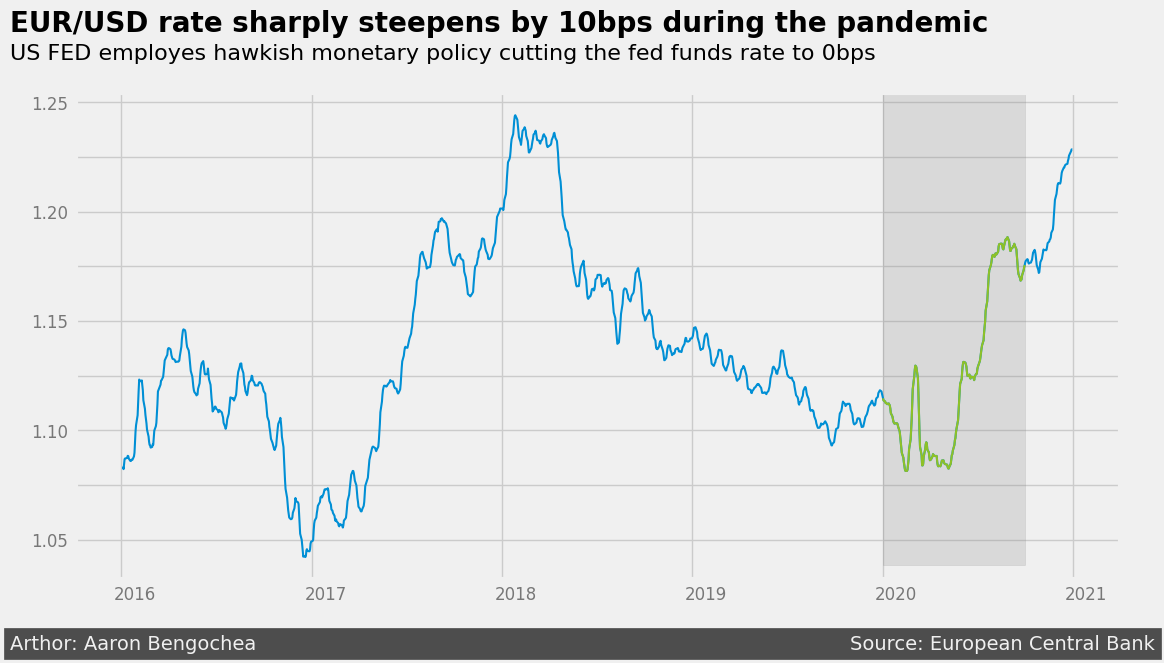

In [39]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))


# Add line plot 
ax.plot(corona_table['TIME'],corona_table['US_DOLLAR_R7d'],linewidth=1.5)

# Add line plot - highlighting specific since this only captures coronavirus specific time period
ax.plot(corona_time_table['TIME'],corona_time_table['US_DOLLAR_R7d'],linewidth=1.5,color='#8ec127')

# remove x/y labels
ax.set_xticklabels([])
ax.set_yticklabels([])


# Add xtitles to our plot
x = 735950
for year in  ['2016', '2017', '2018', '2019', '2020', '2021']:
    ax.text(x, 1.023, year, alpha=0.5, fontsize=12)
    x += 365

# Add ytitles to our plot
y = 1.047
for rate in ['1.05', '1.10', '1.15', '1.20','1.25']:
    ax.text(735790, y, rate, alpha=0.5, fontsize=12)
    y += 0.05
    
# Add highlighting bar     
ax.axvspan(xmin=737425,xmax=737699,ymin=.03,alpha=.2,color='grey')
    

# Add title and subtitle
ax.text(735750,1.2825,'EUR/USD rate sharply steepens by 10bps during the pandemic',size=20,weight='bold') 
ax.text(735750,1.2695,'US FED employes hawkish monetary policy cutting the fed funds rate to 0bps',size=16)    

# Add author and source bar at bottom
ax.text(735750,1,'Arthor: Aaron Bengochea' + ' '*95 + 'Source: European Central Bank',color='#f0f0f0',backgroundcolor='#4d4d4d',size=14)

plt.show()


## Part 2: EUR/USD Performance as a function of US Presidency

Below we perform an analysis and visualization of the currency pair during different US presidency terms. </br>

In [20]:
presidents_table = euro_to_usd[(euro_to_usd['TIME'].dt.strftime('%Y-%m-%d') >= '2001-01-01') & (euro_to_usd['TIME'].dt.strftime('%Y-%m-%d') <= '2021-01-20')]
bush_table = presidents_table[(presidents_table['TIME'].dt.strftime('%Y-%m-%d') >= '2001-01-01') & (presidents_table['TIME'].dt.strftime('%Y-%m-%d') <= '2009-01-19')]
obama_table = presidents_table[(presidents_table['TIME'].dt.strftime('%Y-%m-%d') >= '2009-01-20') & (presidents_table['TIME'].dt.strftime('%Y-%m-%d') <= '2017-01-19')]
trump_table = presidents_table[(presidents_table['TIME'].dt.strftime('%Y-%m-%d') >= '2017-01-20') & (presidents_table['TIME'].dt.strftime('%Y-%m-%d') <= '2021-01-20')]

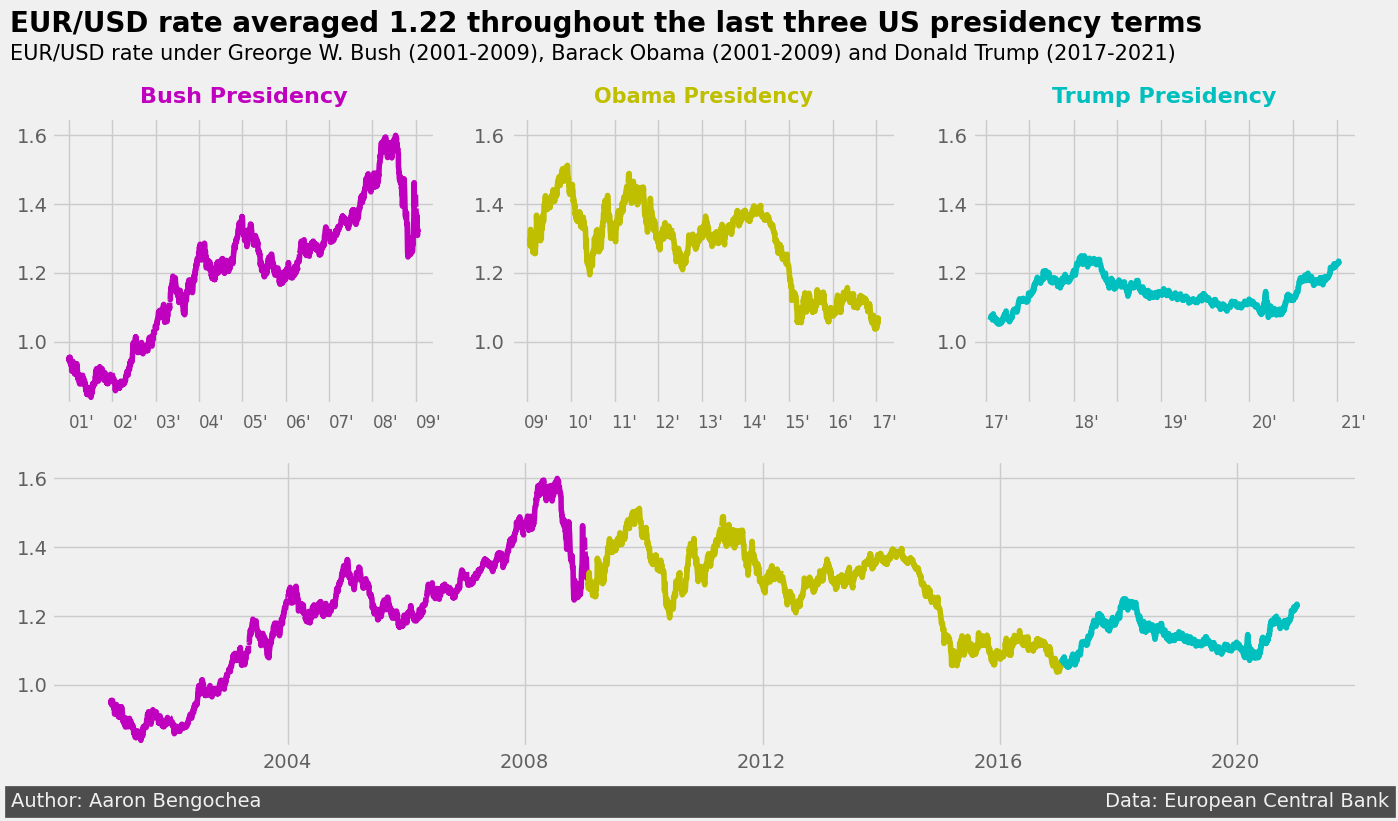

In [123]:
plt.figure(figsize=(15, 12))
# add upper left quadrant line plot
ax1 = plt.subplot(3,3,1)
ax1.plot(bush_table['TIME'],bush_table['US_DOLLAR'],color='m')
ax1.set_title('Bush Presidency',color='m',weight='bold',size=16,y=1.025)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylim([.82,1.65])

bush_years = bush_table['TIME'].sort_values().dt.strftime('%Y').unique()

x_coord = 730490
for year in bush_years:
    new = str(year[2:])
    new = new + "'"
    ax1.text(x_coord,.75,new,size=12,alpha=.6)
    x_coord += 365

    
rates = ['1.0','1.2','1.4','1.6']    
    
y_coord = .9787
for rate in rates:
    ax1.text(730050,y_coord,rate,size=14,alpha=.6)
    y_coord += .2    
    
    

# Add title and subtitle
ax1.text(729990,1.9,'EUR/USD rate averaged 1.22 throughout the last three US presidency terms',size=20,weight='bold')
ax1.text(729990,1.82,'EUR/USD rate under Greorge W. Bush (2001-2009), Barack Obama (2001-2009) and Donald Trump (2017-2021)',size=15)


# add upper middle quadrant line plot
ax2 = plt.subplot(3,3,2)
ax2.plot(obama_table['TIME'],obama_table['US_DOLLAR'],color='y')
ax2.set_title('Obama Presidency',color='y',weight='bold',size=15,y=1.025)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

ax2.set_ylim([.82,1.65])

obama_years = obama_table['TIME'].sort_values().dt.strftime('%Y').unique()

x_coord = 734320
for year in obama_years:
    new = str(year[2:])
    new = new + "'"
    ax1.text(x_coord,.75,new,size=12,alpha=.6)
    x_coord += 365
    
rates = ['1.0','1.2','1.4','1.6']    
    
y_coord = .9787
for rate in rates:
    ax1.text(733900,y_coord,rate,size=14,alpha=.6)
    y_coord += .2    
    

# add upper right quadrant line plot
ax3 = plt.subplot(3,3,3)
ax3.plot(trump_table['TIME'],trump_table['US_DOLLAR'],color='c')
ax3.set_title('Trump Presidency',color='c',weight='bold',size=16,y=1.025)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylim([.82,1.65])


trump_years = trump_table['TIME'].sort_values().dt.strftime('%Y').unique()

x_coord = 738190
for year in trump_years:
    new = str(year[2:])
    new = new + "'"
    ax1.text(x_coord,.75,new,size=12,alpha=.6)
    x_coord += 753
    
rates = ['1.0','1.2','1.4','1.6']    
    
y_coord = .9787
for rate in rates:
    ax1.text(737800,y_coord,rate,size=14,alpha=.6)
    y_coord += .2    

# add bottom quadrant line plot 
ax4 = plt.subplot(3,1,2)
ax4.plot(bush_table['TIME'],bush_table['US_DOLLAR'],color='m')
ax4.plot(obama_table['TIME'],obama_table['US_DOLLAR'],color='y')
ax4.plot(trump_table['TIME'],trump_table['US_DOLLAR'],color='c')
ax4.set_xticklabels([])
ax4.set_yticklabels([])

ax4.set_ylim([.82,1.65])
ax4.text(729870,.645,'Author: Aaron Bengochea' + ' '*135 + 'Data: European Central Bank',backgroundcolor='#4d4d4d',color='#f0f0f0',size=14)

years = ['2004','2008','2012','2016','2020']

x_coord = 731423
for year in years:
    ax4.text(x_coord,.7587,year,size=14,alpha=.6)
    x_coord += 1460

rates = ['1.0','1.2','1.4','1.6']    
    
y_coord = .9787
for rate in rates:
    ax4.text(729910,y_coord,rate,size=14,alpha=.6)
    y_coord += .2



plt.show()

In [ ]:
rates = ['1.0','1.2','1.4','1.6']    
    
y_coord = .7587
for rate in rates:
    ax4.text(730000,.7587,year,size=14,alpha=.6)
    y_coord += .2


### Part 3: Quarterly EUR/USD Returns 





Below we group our dataframe by business quarters in order to calculate returns on the EUR/USD pair on a quarterly basis. We then go ahead and further seperate the dataframe into positive and negative gains so that we can begin to visualize the data.

In [22]:
lastdayofquarter = euro_to_usd.groupby(euro_to_usd['TIME'].dt.to_period('Q'))['TIME'].max()
quarterly = euro_to_usd[euro_to_usd['TIME'].isin(lastdayofquarter)]
prices = np.array(quarterly['US_DOLLAR'])
ret = prices[:-1] / prices[1:] - 1
quarterly = quarterly.iloc[1:,]

quarterly['RET'] = ret
quarterly['YEARQ'] = quarterly['TIME'].dt.strftime('%Y-%m')
quarterly = quarterly[['TIME','RET']]

quarterly.sort_values('TIME',inplace=True)

In [23]:
positive = quarterly.copy()
negative = quarterly.copy()

In [24]:
positive.reset_index(drop=True,inplace=True)
positive.loc[positive['RET']<0, 'RET'] = 0
positive.sort_values('TIME',inplace=True)

In [25]:
negative.reset_index(drop=True,inplace=True)
negative.loc[negative['RET']>0, 'RET'] = 0
negative.sort_values('TIME',inplace=True)

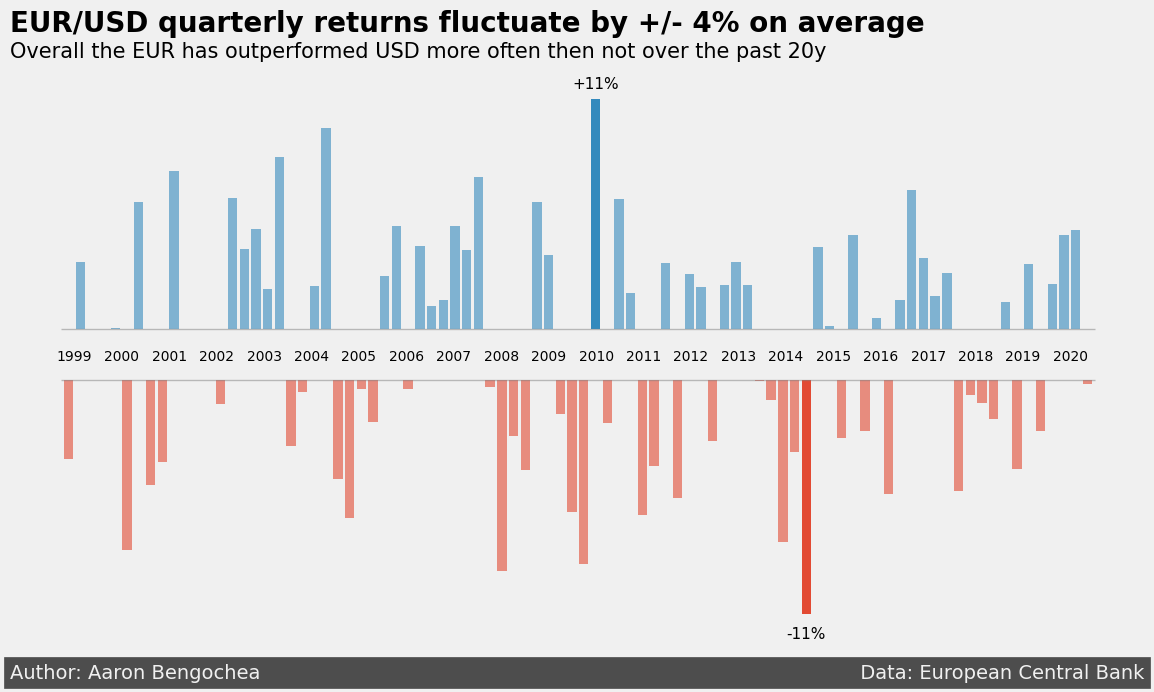

In [125]:
fig, ax = plt.subplots(figsize=(13,7))

# Add bar for positive returns
ax.bar(range(0,len(negative)),positive['RET'],color='#348ABD',alpha=.6)

# Add bar for negative returns
# Move to bottom to make space for xlabels between bars
ax.bar(range(0,len(negative)),negative['RET'],color='#E24A33',alpha=.6,bottom=-.025)

# Remove grid and x/y labels
ax.grid(b=False)
ax.set_yticklabels([])
ax.set_xticklabels([])

# Create new xlabels
years = quarterly['TIME'].dt.strftime('%Y').unique()

# Set first x-coord and y-coord
# Generate xlabels via for loop
x_coord = .5
y_coord = -0.015
for year in years:
    ax.text(x_coord,y_coord,str(year),size=10,ha='center')
    x_coord += 4.05

# Adding horizontal xlabel lines    
hlinemargine = 0.043
ax.axhline(y=-0.025,color='grey',alpha=.5,linewidth=1,xmin=hlinemargine,xmax=1-hlinemargine)
ax.axhline(y=0,color='grey',alpha=.5,linewidth=1,xmin=hlinemargine,xmax=1-hlinemargine)

# Get absolute mean of overall returns from the quarterly dataframe
mean_abs_ret = np.mean(abs(quarterly['RET']))
mean_abs_ret = str(int(round(mean_abs_ret * 100)))


# Add title and subtitle
ax.text(-5,.145,'EUR/USD quarterly returns fluctuate by +/- '+mean_abs_ret+'% on average',size=20,weight='bold')
ax.text(-5,.1325,'Overall the EUR has outperformed USD more often then not over the past 20y',size=15)

# Add author and source bar at bottom
ax.text(-5,-.17,'Author: Aaron Bengochea' + ' '*96 + 'Data: European Central Bank',backgroundcolor='#4d4d4d',color='#f0f0f0')


# Get best return: index text and bar to best result
best = positive[positive['RET'] == positive['RET'].max()]
beststring = '+'+str(int(round(best['RET'].iloc[0]*100,0)))+'%'
ax.text(best.index[0],best['RET'].iloc[0]+.005,beststring,size=11,ha='center')
ax.bar(best.index,best['RET'],color='#348ABD')

#Get worst return: index text and bar to worst result
worst = negative[negative['RET'] == negative['RET'].min()]
worststring = '-'+str(abs(int(round(worst['RET'].iloc[0]*100,0))))+'%'
ax.text(worst.index[0],worst['RET'].iloc[0]-.037,worststring,size=11,ha='center')
ax.bar(worst.index,worst['RET'],bottom=-.025,color='#E24A33')


plt.show()